In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Files to Load 
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)


# Combine the data into a single dataset
cityRide = pd.merge(ride_data, city_data, on='city')

# Display the data table for preview
cityRide.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


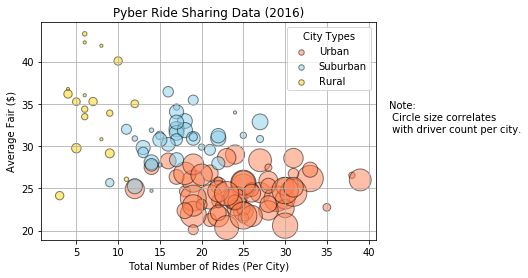

In [3]:
# Obtain the x and y coordinates for each of the three city types
city = cityRide.groupby(['city'])
city = city.mean()
del city['driver_count']
city['rides'] = cityRide['city'].value_counts()
city = pd.merge(city, city_data, how='left', on='city')

urban = city[city['type']=='Urban']
urban_x_axis = urban['rides']
urban_y_axis = urban['fare']
suburban = city[city['type']=='Suburban']
suburban_x_axis = suburban['rides']
suburban_y_axis = suburban['fare']
rural = city[city['type']=='Rural']
rural_x_axis = rural['rides']
rural_y_axis = rural['fare']


# Build the scatter plots for each city types
plt.figure()
plt.scatter(urban_x_axis, urban_y_axis, marker="o", s=(urban['driver_count']*10), facecolors='Coral', 
            edgecolors="black", alpha=0.5, label='Urban')
plt.scatter(suburban_x_axis, suburban_y_axis, marker="o", s=(suburban['driver_count']*10), facecolors='SkyBlue', 
            edgecolors="black", alpha=0.5, label='Suburban')
plt.scatter(rural_x_axis, rural_y_axis, marker="o", s=(rural['driver_count']*10), facecolors='Gold', 
            edgecolors="black", alpha=0.5, label='Rural')


# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fair ($)")
plt.grid()

# Create a legend
lgnd = plt.legend(loc="upper right", title="City Types")
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]


# Incorporate a text label regarding circle size
side_text = plt.figtext(0.93, 0.5, 'Note: \n Circle size correlates \n with driver count per city.')

# Save Figure
plt.savefig('output/pyber_ride_share_data.png', bbox_extra_artists=(side_text,), bbox_inches='tight')
plt.show()